<a href="https://colab.research.google.com/github/sseydaltin/makine/blob/main/hafta4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TIPS VERİSETİ GÖRSELLEŞTİRME**

In [ ]:
import numpy as np
import seaborn as sns

# Seaborn'dan tips veri setini yükleme
tips = sns.load_dataset("tips")

# NumPy kullanarak sütunları gösterme
columns = np.array(tips.columns)

# Sütun isimlerini yazdırma
print(columns)


['total_bill' 'tip' 'sex' 'smoker' 'day' 'time' 'size']


### **Veri Seti Tanıtımı**
- `tips` veri seti, restoran faturaları ve bahşiş bilgilerini içermektedir.  
- İçerdiği değişkenler:  
  - **total_bill**: Toplam hesap tutarı  
  - **tip**: Bahşiş miktarı  
  - **sex**: Cinsiyet (erkek/kadın)  
  - **smoker**: Sigara içen/ içmeyen  
  - **day**: Gün (Thu, Fri, Sat, Sun)  
  - **time**: Günün zamanı (Lunch/Dinner)  
  - **size**: Masa büyüklüğü (kişi sayısı)


# 1. Toplam Hesap (total_bill) ve Bahşiş (tip) Arasındaki İlişki

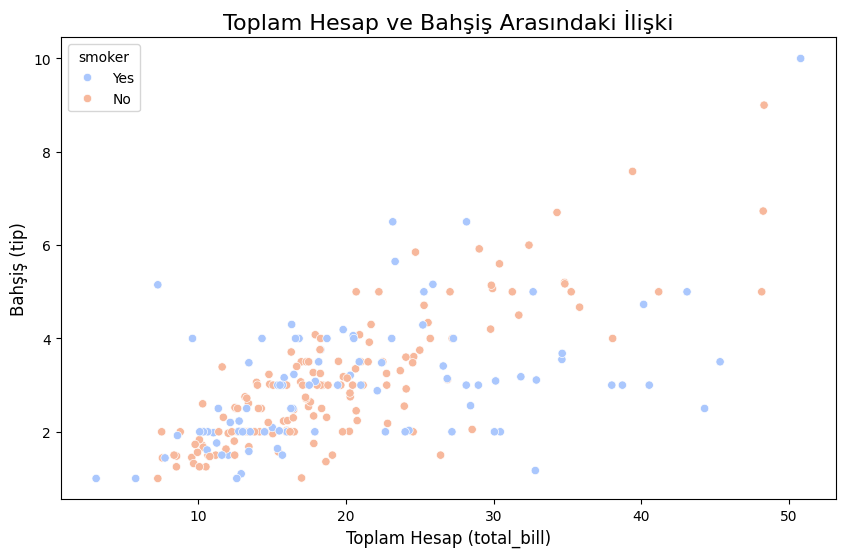

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter Plot oluşturuyoruz: total_bill ve tip arasındaki ilişkiyi görselleştiriyoruz
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="smoker", palette="coolwarm")

# Başlık ve eksen isimlerini ekliyoruz
plt.title("Toplam Hesap ve Bahşiş Arasındaki İlişki", fontsize=16)
plt.xlabel("Toplam Hesap (total_bill)", fontsize=12)
plt.ylabel("Bahşiş (tip)", fontsize=12)

# Grafiği gösteriyoruz
plt.show()


# Yorum
Genel olarak toplam hesap arttıkça bahşiş miktarı artıyor.
Sigara içme durumu, bahşiş miktarını doğrudan etkilemiyor gibi görünüyor.
Birkaç istisnai durum dışında, sigara içenler ve içmeyenler benzer bahşiş davranışları gösteriyor.
Aşırı yüksek hesaplarda (40$+) daha değişken bahşiş oranları gözleniyor.

# 2. Günlere Göre Toplam Hesap Dağılımı

<ipython-input-22-97b51c39f5e5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tips, x="day", y="total_bill", palette="Set2")


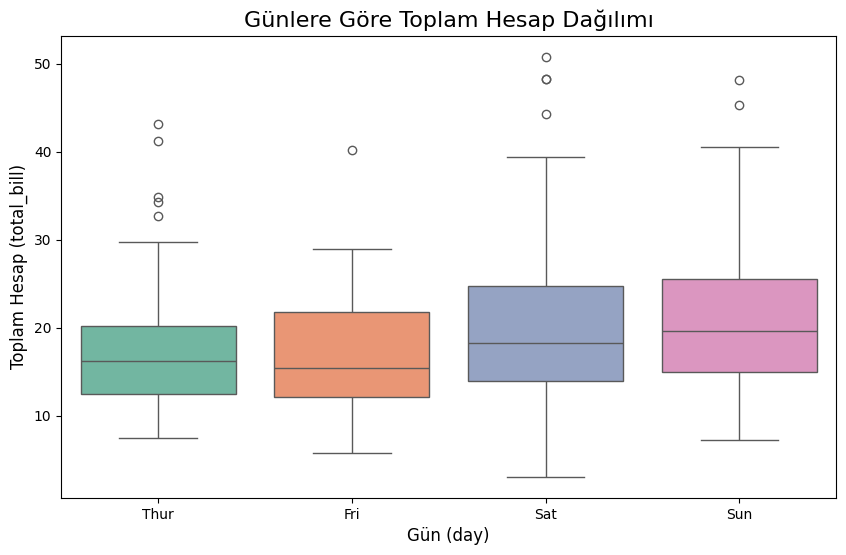

In [ ]:
# Boxplot oluşturuyoruz: Günlere göre toplam hesap tutarını analiz ediyoruz
plt.figure(figsize=(10, 6))
sns.boxplot(data=tips, x="day", y="total_bill", palette="Set2")

# Başlık ve eksen isimlerini ekliyoruz
plt.title("Günlere Göre Toplam Hesap Dağılımı", fontsize=16)
plt.xlabel("Gün (day)", fontsize=12)
plt.ylabel("Toplam Hesap (total_bill)", fontsize=12)

# Grafiği gösteriyoruz
plt.show()


# Yorum

Günlere göre toplam hesap tutarını incelediğimizde, genellikle Cuma ve Cumartesi günlerinde toplam hesapların daha yüksek olduğunu gözlemleyebiliriz. Bu, haftanın sonlarına doğru restoranların daha kalabalık olmasından ve insanların genellikle hafta sonu daha fazla harcama yapmasından kaynaklanabilir.

Cuma ve Cumartesi günlerinde, daha fazla aykırı değer (outlier) ve daha geniş bir dağılım olabilir, bu da bu günlerin yüksek harcamalarla ilişkilendirilebileceğini gösterir.
Perşembe ve Pazar ise genellikle daha düşük toplam hesaplarla karakterizedir, çünkü hafta ortasında ve hafta sonunun başında insanlar genellikle daha sade yemekler tercih edebilir.

# 3. Masa Büyüklüğüne Göre Bahşiş Oranları

In [ ]:
# Yeni bir sütun ekliyoruz: tip_rate (Bahşiş Oranı)
tips['tip_rate'] = (tips['tip'] / tips['total_bill']) * 100

# Yeni sütunla birlikte veri setini gösteriyoruz
tips.head()


,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


<ipython-input-14-19c5b3e4fc19>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='size', y='tip_rate', data=tips, palette='Blues')


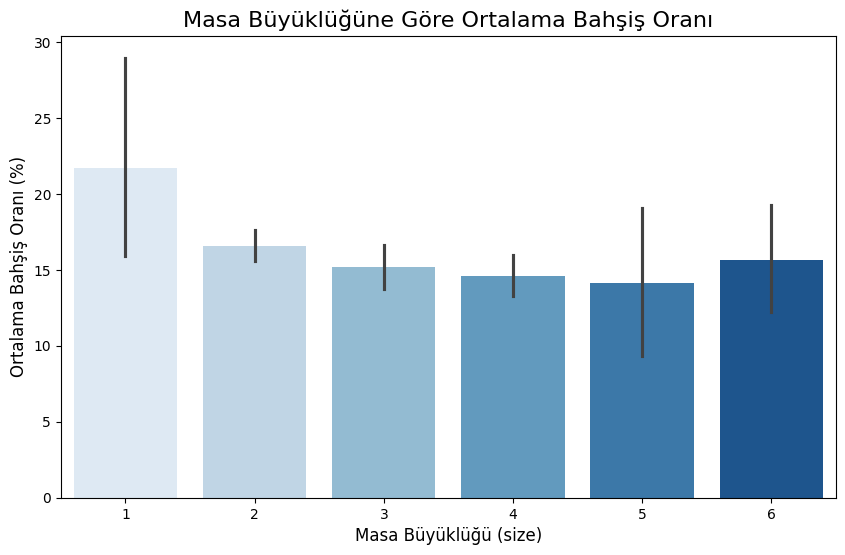

In [ ]:

# Bahşiş oranını hesapla
tips['tip_rate'] = (tips['tip'] / tips['total_bill']) * 100

# Barplot oluştur: Masa büyüklüğüne göre ortalama bahşiş oranını görselleştir
plt.figure(figsize=(10, 6))
sns.barplot(x='size', y='tip_rate', data=tips, palette='Blues')

# Başlık ve eksen isimlerini ekle
plt.title("Masa Büyüklüğüne Göre Ortalama Bahşiş Oranı", fontsize=16)
plt.xlabel("Masa Büyüklüğü (size)", fontsize=12)
plt.ylabel("Ortalama Bahşiş Oranı (%)", fontsize=12)

# Grafiği göster
plt.show()


# **Yorum**
Masa büyüklüğü arttıkça, genellikle bahşiş oranı düşer. Küçük masalar daha yüksek oranlarda bahşiş bırakırken, büyük gruplar daha düşük oranlarda bahşiş verebiliyor. Bu durum, büyük grupların hesaplarının artmasına rağmen, kişi başı düşen bahşiş oranının azalmasından kaynaklanabilir.

# 4. Günün Zamanına Göre Bahşiş Dağılımı

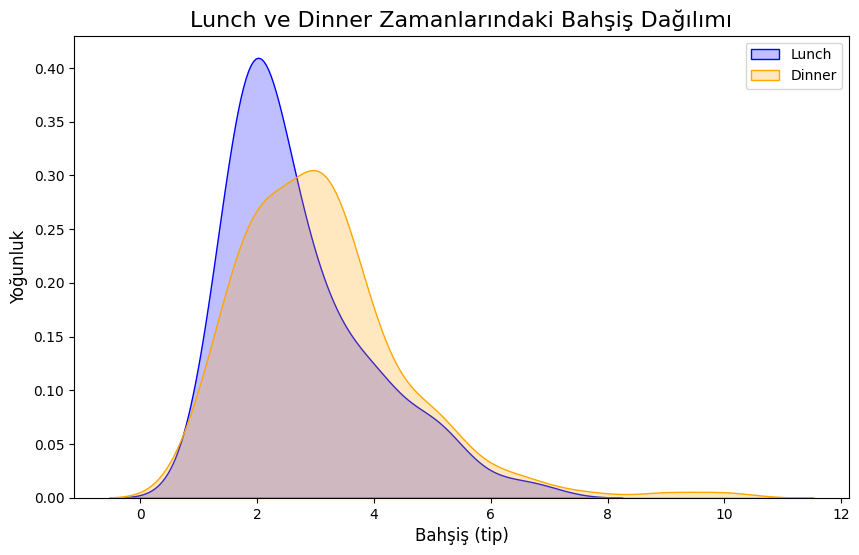

In [ ]:

# Histogram ve KDE kullanarak Lunch ve Dinner zamanlarındaki bahşiş dağılımını karşılaştır
plt.figure(figsize=(10, 6))
sns.kdeplot(data=tips[tips['time'] == 'Lunch'], x='tip', fill=True, color='blue', label='Lunch')
sns.kdeplot(data=tips[tips['time'] == 'Dinner'], x='tip', fill=True, color='orange', label='Dinner')

# Başlık ve eksen isimlerini ekle
plt.title("Lunch ve Dinner Zamanlarındaki Bahşiş Dağılımı", fontsize=16)
plt.xlabel("Bahşiş (tip)", fontsize=12)
plt.ylabel("Yoğunluk", fontsize=12)

# Grafiği göster
plt.legend()
plt.show()


# Yorum
Dinner zamanı, Lunch zamanına göre genellikle daha yüksek bahşişler gösterir. Bunun nedeni, akşam yemeklerinde genellikle daha fazla kişi ve daha büyük hesaplar olabileceğidir. Ayrıca, akşam yemeklerinde daha fazla lüks restoran veya daha fazla yemek harcaması yapılıyor olabilir.



Lunch zamanında ise daha kısa süreli ve daha küçük hesaplar olduğundan, bahşişler daha düşük yoğunlukta olabilir.

Sonuç olarak, akşam yemekleri (Dinner) genellikle daha yüksek bahşişlere sahip olabilir, çünkü akşam saatlerinde yapılan yemekler genellikle daha pahalı ve kalabalıktır.

# Korelasyon Analizi

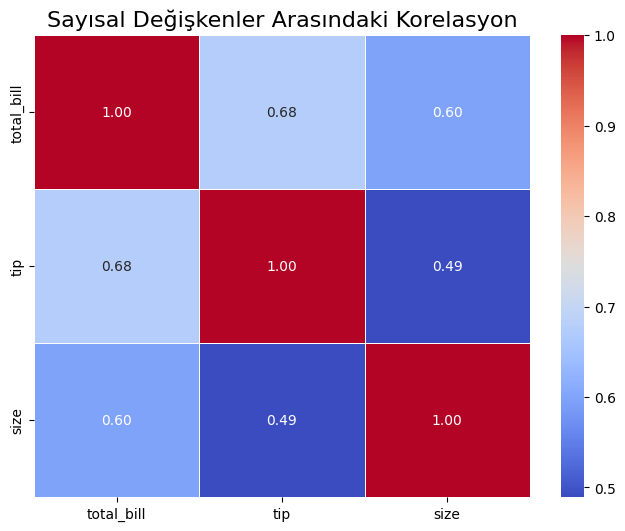

In [ ]:
# Korelasyon matrisini hesapla
corr_matrix = tips.select_dtypes(include=np.number).corr() # Only include numerical features for correlation calculation

# Korelasyon matrisini Heatmap ile görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Başlık ekle
plt.title("Sayısal Değişkenler Arasındaki Korelasyon", fontsize=16)

# Grafiği göster
plt.show()

# Yorum

Toplam Hesap (total_bill) ve Bahşiş (tip) arasında genellikle güçlü bir pozitif korelasyon vardır. Yani, toplam hesap arttıkça bahşiş de artar. Bu, mantıklıdır çünkü daha büyük hesaplar genellikle daha fazla bahşişe yol açar.

Toplam Hesap (total_bill) ve Tip Oranı (tip_rate) arasında negatif bir ilişki olabilir. Toplam hesap arttıkça, bahşiş oranı genellikle düşer, çünkü büyük hesaplarda genellikle sabit bir yüzdelik oran kullanılır.